In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os
import cv2    
from tqdm import tqdm
import random as random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D,BatchNormalization
from keras.models import Sequential
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')


Using TensorFlow backend.


In [0]:
imagedetails = []
imagelabels = []
IMG_SIZE=150
#definig the path for each type in the drive
daisy_dir='/content/drive/My Drive/flowers/daisy'
sunflower_dir='/content/drive/My Drive/flowers/sunflower'
tulip_dir='/content/drive/My Drive/flowers/tulip'
dandelion_dir='/content/drive/My Drive/flowers/dandelion'
rose_dir='/content/drive/My Drive/flowers/rose'

In [5]:
def read_image(label,DIR):
    
    for img in tqdm(os.listdir(DIR)):
    #for img in DIR:
        path = os.path.join(DIR,img)
        #checking image type
        _, ftype = os.path.splitext(path)
        if ftype == ".jpg":
       
            image = cv2.imread(path,cv2.IMREAD_COLOR)
            image = cv2.resize(image, (IMG_SIZE,IMG_SIZE),interpolation = cv2.INTER_AREA)
            imagedetails.append(np.array(image))
            imagelabels.append(str(label))

read_image("Daisy",daisy_dir)
read_image("Sunflower",sunflower_dir)
read_image("Tulip",tulip_dir)
read_image("Dandelion",dandelion_dir)
read_image("Rose",rose_dir)

100%|██████████| 784/784 [03:15<00:00,  4.00it/s]


In [6]:
encoder = LabelEncoder()
#converting the images into arrays which will have its intensity values
X = np.array(imagedetails)
print(X)
#divide by 255 is to make the analysis easy because each color 8 plains (2^8==256)
X = X/255
print(X)
print(imagelabels)
#transformig the image labels into integers because it easy to deal with integers compared to strings;
y = encoder.fit_transform(imagelabels)
#dividing into 5 categories
y = to_categorical(y,5)
print(y)
print(X.shape)
print(y.shape)

[[[[117 129 133]
   [111 124 124]
   [103 112 114]
   ...
   [144 167 164]
   [142 168 164]
   [129 155 144]]

  [[116 125 127]
   [101 110 109]
   [ 92  95  99]
   ...
   [130 146 143]
   [134 152 148]
   [122 141 131]]

  [[106 110 110]
   [ 95  96  97]
   [ 85  77  86]
   ...
   [115 131 125]
   [115 131 126]
   [114 130 120]]

  ...

  [[ 41  12  28]
   [ 41  12  28]
   [ 40  11  27]
   ...
   [ 83  24  49]
   [ 82  21  49]
   [ 85  22  51]]

  [[ 40  11  27]
   [ 39  10  26]
   [ 40  11  27]
   ...
   [ 83  23  51]
   [ 86  25  53]
   [ 87  25  53]]

  [[ 38   9  24]
   [ 37   8  23]
   [ 40  11  26]
   ...
   [ 83  23  52]
   [ 85  24  52]
   [ 84  22  49]]]


 [[[223 216 212]
   [221 214 210]
   [225 216 214]
   ...
   [ 17  12  12]
   [ 15  10  10]
   [ 13   8   8]]

  [[227 220 218]
   [230 222 220]
   [225 218 215]
   ...
   [ 15  12  13]
   [ 13   8   9]
   [ 12   7   7]]

  [[235 226 226]
   [232 224 221]
   [230 225 222]
   ...
   [ 15  13  13]
   [ 15  10  11]
   [ 13   8

In [7]:
#dividing the entire dataset into training data and validation data
X_train,X_valid,y_train,y_valid = train_test_split(X,y,test_size=0.2,random_state=42)
#dividing the training dataset into training and testing
X_train,X_test,y_train,y_test = train_test_split(X_train,y_train,test_size=0.2,random_state=42)
X_train.shape,y_train.shape,X_valid.shape,y_valid.shape,X_test.shape,y_test.shape
# sum should result in total(4333)

((2772, 150, 150, 3),
 (2772, 5),
 (867, 150, 150, 3),
 (867, 5),
 (694, 150, 150, 3),
 (694, 5))

In [8]:
batch_size = 64
# as we increase the number of epochs the accuracy will increase
epochs = 30
print(y.shape[1])

5


In [0]:
model = Sequential()
#we are using sequential model

#kernel size is mask                                                                                                                              xrnel
model.add(Conv2D(64, kernel_size=(3, 3),activation='relu',input_shape=(IMG_SIZE,IMG_SIZE,3)))
model.add(MaxPool2D((2, 2)))
#dropout is used to prevent the overfitting by a given percentage
model.add(Dropout(0.2))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(5, activation='softmax'))


In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 128)       0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 36, 36, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 165888)           

In [0]:
model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.001),metrics=['accuracy'])

In [0]:
imagegen = ImageDataGenerator(featurewise_center=False,
                             samplewise_center=False,
                             featurewise_std_normalization=False,
                             samplewise_std_normalization=False,
                            rotation_range=60,
                              zoom_range=0.1,
                              width_shift_range=0.1,
                              height_shift_range=0.1,
                              shear_range=0.1,
                              fill_mode='reflect')
imagegen.fit(X_train)

In [13]:
model_dropout = model.fit_generator(imagegen.flow(X_train,y_train, batch_size=batch_size),epochs=epochs,verbose=1,
                          validation_data=(X_valid, y_valid),steps_per_epoch=200)
# even if we change the steps_per_epoch ten also the accuracy will increase

Epoch 1/30
200/200 [==============================] - 773s 4s/step - loss: 1.7651 - accuracy: 0.4376 - val_loss: 1.3144 - val_accuracy: 0.4637
Epoch 2/30
200/200 [==============================] - 763s 4s/step - loss: 1.1061 - accuracy: 0.5594 - val_loss: 1.0232 - val_accuracy: 0.5952
Epoch 3/30
200/200 [==============================] - 762s 4s/step - loss: 1.0255 - accuracy: 0.5936 - val_loss: 0.9197 - val_accuracy: 0.6482
Epoch 4/30
200/200 [==============================] - 761s 4s/step - loss: 0.9150 - accuracy: 0.6374 - val_loss: 0.8463 - val_accuracy: 0.6828
Epoch 5/30
200/200 [==============================] - 766s 4s/step - loss: 0.8479 - accuracy: 0.6695 - val_loss: 0.7920 - val_accuracy: 0.7001
Epoch 6/30
200/200 [==============================] - 759s 4s/step - loss: 0.7871 - accuracy: 0.6914 - val_loss: 0.7724 - val_accuracy: 0.7024
Epoch 7/30
200/200 [==============================] - 760s 4s/step - loss: 0.7327 - accuracy: 0.7182 - val_loss: 0.7944 - val_accuracy: 0.6828

In [22]:
test_eval = model.evaluate(X_test, y_test, verbose=1)
print('\n', 'Test Loss','Test accuracy:', test_eval[0],test_eval[1])

694/694 [==============================] - 10s 15ms/step

 Test Loss Test accuracy: 1.1535043058546544 0.7435158491134644


In [0]:
#for the train set X we are calculating the output y using the model defined above 
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred,axis=1).astype(int)
# converting both the values to int will help us to compare easily
y_true = np.argmax(y_test,axis = 1).astype(int)

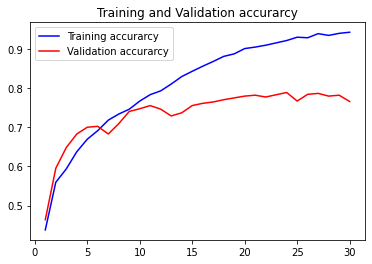

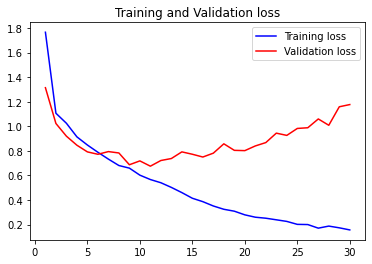

In [16]:

acc = model_dropout.history['accuracy']
val_acc = model_dropout.history['val_accuracy']
loss = model_dropout.history['loss']
val_loss = model_dropout.history['val_loss']
epochs = range(1, len(acc) + 1)
#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

In [17]:
corr=[]
incorr=[]
corr_count=0
incorr_count=0

for i in range(len(y_test)):
   # checking for correct predictions
    if(y_pred[i]==y_true[i]):
        corr.append(i)
        corr_count+=1
    else:
        incorr.append(i)
        incorr_count+=1
        
print("%d flowers are identified correctly" %(corr_count))
print("%d flowers are identified incorrectly" %(incorr_count))

516 flowers are identified correctly
178 flowers are identified incorrectly


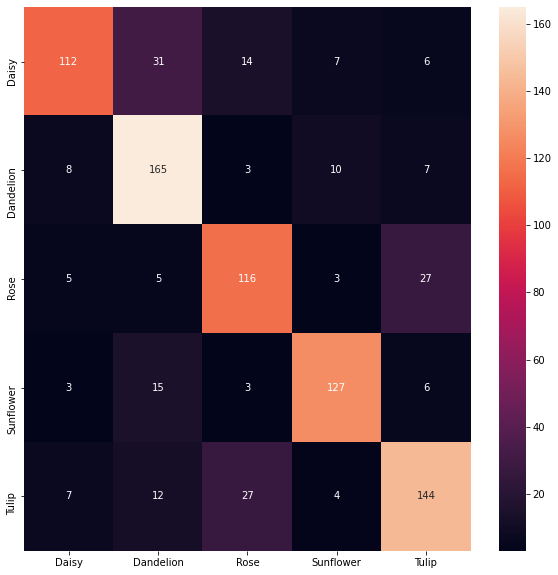

In [24]:
#confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd 
y_pred=model.predict(X_valid)
y_pred_classes=np.argmax(y_pred,axis=1)
y_true=np.argmax(y_valid,axis=1)
#compute conf mat
conf_mat=confusion_matrix(y_true,y_pred_classes)
#plot the con mat
f,ax=plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat,annot=True,fmt='.0f')
ax.set_xticklabels(np.unique(imagelabels))
ax.set_yticklabels(np.unique(imagelabels))
plt.show()

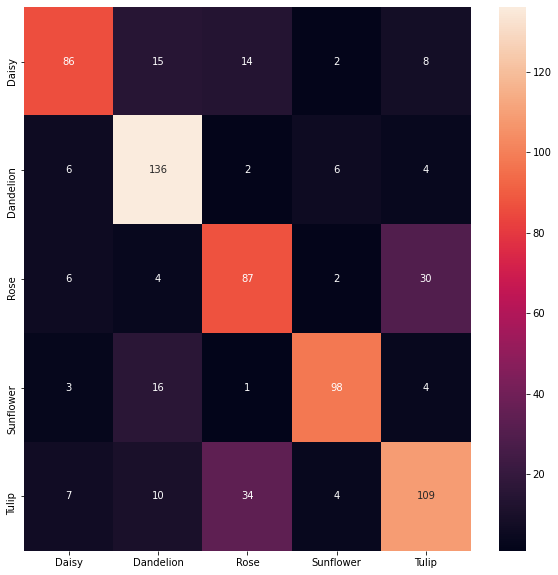

In [25]:
#confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd 
y_pred=model.predict(X_test)
y_pred_classes=np.argmax(y_pred,axis=1)
y_true=np.argmax(y_test,axis=1)
#compute conf mat
conf_mat=confusion_matrix(y_true,y_pred_classes)
#plot the con mat
#fruit_names=["Apple","Avocado","Banana","Cherry","Cocos","Kiwi","Lemon","Mango","Orange"]
f,ax=plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat,annot=True,fmt='.0f')
ax.set_xticklabels(np.unique(imagelabels))
ax.set_yticklabels(np.unique(imagelabels))
plt.show()